In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.io import loadmat

# [DEBUG] Scalar LST - Chebyshev Basis

This file is to check if errors originate from computational error of Chebyshev Basis.

In [53]:
# Input parameters 
N       = 384 # number of Chebyshev polynomials

R  = 180         # Reynolds number
kx = 1           # streamwise wavenumber
kz = 0           # spanwise wavenumber
Ri = 0.0        # Richardson number
Pr = 0.71        # Prantl number
Ra = 8*R*R/Pr*Ri # Rayleigh number
print('Rayleigh number is '+ str(Ra))

bf = 2   # set = 1 for Couette, 2 for Poiseuille, 3 for quiescent

Rayleigh number is 0.0


In [54]:
def dmat(N):
    num = N-1
    D0 = np.cos(np.arange(N)[np.newaxis, :]  * np.pi * np.arange(N)[:, np.newaxis] / num )
    
    # create higher derivative matrices
    D1 = np.concatenate((np.zeros(shape=(N, 1)), D0[:, 0][:, np.newaxis], 4*D0[:, 1][:, np.newaxis]), axis=1)
    D2 = np.concatenate((np.zeros(shape=(N, 2)),                          4*D1[:, 1][:, np.newaxis]), axis=1)
    D3 = np.zeros(shape=(N, 3))
    D4 = np.zeros(shape=(N, 3))



    for j in range(3, N):
        D1= np.concatenate((D1, 2*j*D0[:, j-1][:, np.newaxis]+j*D1[:, j-2][:, np.newaxis]/(j-2)), axis=1)
        D2= np.concatenate((D2, 2*j*D1[:, j-1][:, np.newaxis]+j*D2[:, j-2][:, np.newaxis]/(j-2)), axis=1)
        D3= np.concatenate((D3, 2*j*D2[:, j-1][:, np.newaxis]+j*D3[:, j-2][:, np.newaxis]/(j-2)), axis=1)
        D4= np.concatenate((D4, 2*j*D3[:, j-1][:, np.newaxis]+j*D4[:, j-2][:, np.newaxis]/(j-2)), axis=1)
        
    return D0, D1, D2, D3, D4

In [55]:
vars = loadmat("/Users/user/Documents/Projects/python_util/data/scalar_LST_matlab_linux.mat")
print(vars.keys())


dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'D0p', 'D1p', 'D2p', 'D3p', 'D4p', 'E', 'M', 'N', 'Pr', 'R', 'Ra', 'Ri', 'T', 'Temperature', 'Tp', 'U', 'Up', 'Upp', 'V', 'aa', 'ans', 'bf', 'cf', 'ctl', 'dt', 'epsilon', 'fontsize_', 'None', 'ind', 'input', 'k2', 'kx', 'kz', 'linewidth_', 'omega', 'output', 'q', 'sp', 'tickfontsize_', 'tt', 'x', 'y_low', 'y_phys', 'y_top', '__function_workspace__'])


In [56]:
D0,D1,D2,D3,D4 = dmat(N)   # Chebyshev polynomials and derivatives at the Gauss points

In [57]:
np.sum(D0 - vars["D0p"])

6.481187114770748e-14

Looks like D0 is accurate.

In [58]:
np.sum(np.abs(D1 - vars["D1p"]))

3.1653674754245076e-08

In [59]:
np.sum(np.abs(D2 - vars["D2p"]))

0.0009391680606131297

**Find the error.**

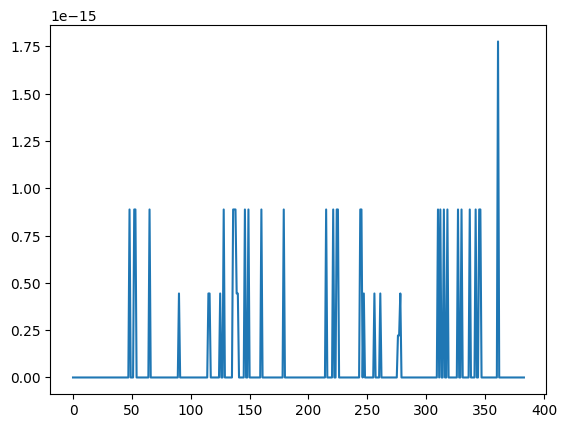

In [60]:
ind = 3

plt.plot(np.abs(D1[:, ind] - vars["D1p"][:, ind]))

In [61]:
j = 3
2*j*D0[:, j-1][:, np.newaxis]+j*D1[:, j-1][:, np.newaxis]/(j-1) - vars["D1p"][:, j]

array([[ 3.        ,  3.00080737,  3.00322927, ...,  3.00322927,
         3.00080737,  3.        ],
       [ 2.99899078,  2.99979815,  3.00222005, ...,  3.00222005,
         2.99979815,  2.99899078],
       [ 2.99596336,  2.99677073,  2.99919263, ...,  2.99919263,
         2.99677073,  2.99596336],
       ...,
       [-9.0024219 , -9.00161453, -8.99919263, ..., -8.99919263,
        -9.00161453, -9.0024219 ],
       [-9.00060553, -8.99979815, -8.99737625, ..., -8.99737625,
        -8.99979815, -9.00060553],
       [-9.        , -8.99919263, -8.99677073, ..., -8.99677073,
        -8.99919263, -9.        ]])